Josue David Castillo Araiza

In this program I perform a complete analysis for an Indian company of fastfood delivery. Make displays and stadistics of rating values and number of types and restaurant and demand. Also a spatial analysis with geocode to see the distribution of restaurants in differents locations.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
import plotly.graph_objs as go
from plotly.offline import iplot
from geopy.geocoders import Nominatim

In [2]:
!pip install plotly
!pip install geopy
!pip install folium

In [3]:
import plotly.express as px

In [24]:
os.chdir('/content/drive/MyDrive/Josue/Programas personales phyton/Curso Udemy Data Analytics Real-World Projects in Python/Zomato/3-Zomato Data Analysis/')

In [25]:
df = pd.read_csv('zomato.csv')

# Preparing data

In [6]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [26]:
df.dtypes

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

In [27]:
df.shape

(51717, 17)

In [28]:
df.isnull().sum() #check the total null values

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [29]:
feature_na = [feature for feature in df.columns if df[feature].isnull().sum()>0]
feature_na

['rate',
 'phone',
 'location',
 'rest_type',
 'dish_liked',
 'cuisines',
 'approx_cost(for two people)']

In [30]:
for feature in feature_na:
	print(' {} has: {}% of missing values'.format(feature,np.round(df[feature].isnull().sum()/len(df)*100)))

 rate has: 15.0% of missing values
 phone has: 2.0% of missing values
 location has: 0.0% of missing values
 rest_type has: 0.0% of missing values
 dish_liked has: 54.0% of missing values
 cuisines has: 0.0% of missing values
 approx_cost(for two people) has: 1.0% of missing values


In [31]:
df['rate'].unique() #rates we have

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [32]:
df.dropna(axis = 'index', subset = ['rate'], inplace = True) ##Drop nan values

In [33]:
df.replace({'NEW':0, '-':0}, inplace = True) ##clean the rest of data

In [34]:
df['rate'].unique() #Check if worked

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 0, '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5', '4.5/5',
       '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5', '3.4 /5',
       '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5', '4.1 /5',
       '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5', '3.5 /5',
       '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5', '4.3 /5',
       '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5', '4.9 /5',
       '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5', '2.1 /5',
       '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [48]:
def split(x):
	return x.split('/')[0]
 #This function split the number/5 rate to just the rate 

In [49]:
df['rate']=df['rate'].str.replace('/5', ' ')
#df['rate'] = df['rate'].apply(split) #Apply the function and sustitute our df rates values

In [50]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [51]:
df['rate'] = df['rate'].astype(float)

In [52]:
df.head() #Now data is ready to analysis

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


# Trending restaurants

In [53]:
df_rate = df.groupby('name')['rate'].mean().to_frame().reset_index()
df_rate.columns = ['restaurant','avg_rating']
df_rate.head(6)

,restaurant,avg_rating
0,#FeelTheROLL,3.4
1,#L-81 Cafe,3.9
2,#refuel,3.7
3,1000 B.C,3.2
4,100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C,3.7
5,11 to 11 Express Biriyanis,3.5


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



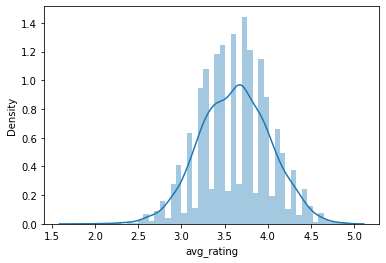

In [54]:
sns.distplot(df_rate['avg_rating'])
#Can be adapted to displot because a upgrade on the library
#Shows a normal distribution on the average rating of restaurants

Text(0.5, 0, 'Number of outlets')

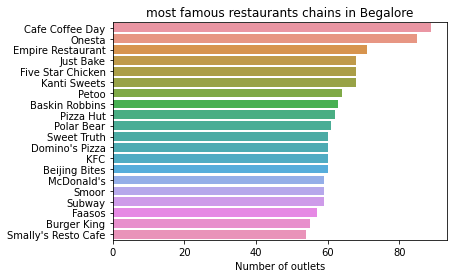

In [55]:
chains=df['name'].value_counts()[0:20] ##The most trending chains
sns.barplot(x=chains, y=chains.index)
plt.title('most famous restaurants chains in Begalore')
plt.xlabel('Number of outlets')

In [56]:
df['online_order'].value_counts()

Yes    28308
No     15634
Name: online_order, dtype: int64

In [57]:
x = df['online_order'].value_counts()
labels=['accepted' 'Not accepted']
px.pie(df, values=x, labels=labels, title='Pie Chart')

In [58]:
df['book_table'].value_counts()

No     37509
Yes     6433
Name: book_table, dtype: int64

In [59]:
y=df['book_table'].value_counts()

In [60]:
labels = ['Not booked', 'Booked']
trace = go.Pie(labels = labels, values = y, hoverinfo = 'label+percent', textinfo = 'value')
iplot([trace]) #This is another way to plot a Pie grapg in an interactive way, showing percentage 

In [61]:
df['rest_type'].isna().sum()
df['rest_type'].dropna()

0              Casual Dining
1              Casual Dining
2        Cafe, Casual Dining
3                Quick Bites
4              Casual Dining
                ...         
51709     Casual Dining, Bar
51711     Casual Dining, Bar
51712                    Bar
51715                    Bar
51716     Bar, Casual Dining
Name: rest_type, Length: 43791, dtype: object

In [62]:
trace1 = go.Bar(x=df['rest_type'].value_counts().nlargest(20).index,
y=df['rest_type'].value_counts().nlargest(20)#.index
)

In [63]:
iplot([trace1]) #Type of restaurant and service

In [64]:
len(df['rest_type'].unique())

88

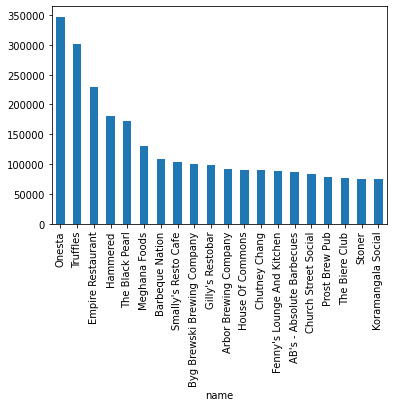

In [65]:
df.groupby('name')['votes'].sum().nlargest(20).plot.bar() #A different way to visualize data (not interactive). Restaurants

In [66]:
trace2 = go.Bar(x=df.groupby('name')['votes'].sum().nlargest(20).index,
y=df.groupby('name')['votes'].sum().nlargest(20)
)
iplot([trace2]) #Restaurants and number of votes recibed

In [67]:
restaurants = []
location=[]
for key, location_df in df.groupby('location'):
	location.append(key)
	restaurants.append(len(location_df['name'].unique()))
 #Building a new data frame with 2 arrays in a 1 to 1 configuration

In [68]:
df_total = pd.DataFrame(zip(location,restaurants)) ##Zip them to make the table
df_total.head()

,0,1
0,BTM,581
1,Banashankari,238
2,Banaswadi,151
3,Bannerghatta Road,362
4,Basavanagudi,195


In [69]:
df_total.columns = ['location', 'restaurants']

In [70]:
df_total.head()

,location,restaurants
0,BTM,581
1,Banashankari,238
2,Banaswadi,151
3,Bannerghatta Road,362
4,Basavanagudi,195


In [71]:
df_total.set_index('location', inplace = True)
df_total.head()
#If set location like index, we can perform an easier analysis with the restaurants sorting just by them

,restaurants
location,
BTM,581
Banashankari,238
Banaswadi,151
Bannerghatta Road,362
Basavanagudi,195


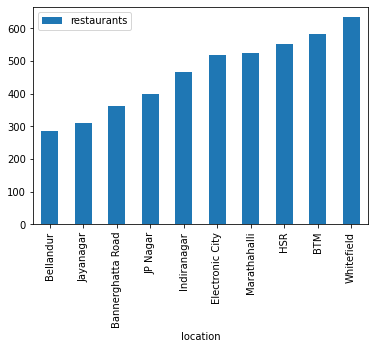

In [72]:
df_total.sort_values(by = 'restaurants').tail(10).plot.bar()

###Analysing Prices

In [73]:
cuisines = df['cuisines'].value_counts()[0:10]

In [74]:
cuisines

North Indian                           2294
North Indian, Chinese                  2060
South Indian                           1320
Cafe                                    653
Bakery, Desserts                        644
Biryani                                 641
South Indian, North Indian, Chinese     601
Fast Food                               580
Desserts                                572
Chinese                                 449
Name: cuisines, dtype: int64

In [75]:
trace3 = go.Bar(
x = df['cuisines'].value_counts()[0:10].index,
y = df['cuisines'].value_counts()[0:10]
)
iplot([trace3]) #Type of cuisines most requested in Belgare 

In [76]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [77]:
df['approx_cost(for two people)'].isna().sum()

252

In [78]:
df.dropna(axis = 'index', subset = ['approx_cost(for two people)'], inplace = True)

In [79]:
df['approx_cost(for two people)'].isna().sum()

0

In [80]:
df['approx_cost(for two people)']=df['approx_cost(for two people)']. apply(lambda x: x.replace(',', '')) 
#Data have ',' in some values, so I replace them

In [81]:
df['approx_cost(for two people)'].astype(int)
#Originaly they are objects, so need to change them to numerical values

0         800
1         800
2         800
3         300
4         600
         ... 
51709     800
51711     800
51712    1500
51715    2500
51716    1500
Name: approx_cost(for two people), Length: 43690, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



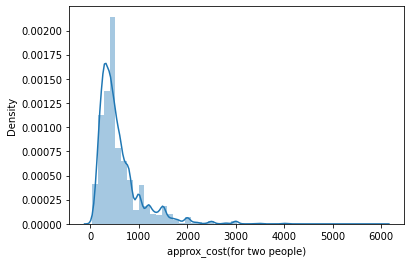

In [82]:
sns.distplot(df['approx_cost(for two people)']);

[]

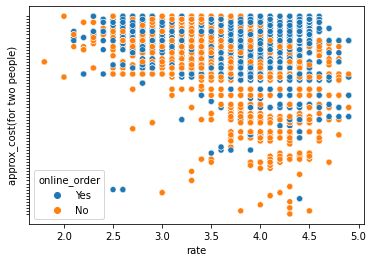

In [83]:
ax=sns.scatterplot(x = 'rate', y='approx_cost(for two people)', hue = 'online_order',data = df)
ax.set_yticklabels([])

In [84]:
df['approx_cost(for two people)'].max()

'950'

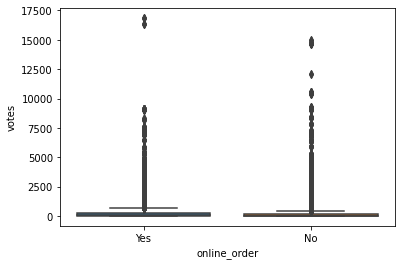

In [85]:
sns.boxplot(x = 'online_order', y = 'votes', data =df)

In [86]:
px.box(df, x='online_order', y='votes')

In [87]:
px.box(df, x='online_order', y='approx_cost(for two people)')
#Here you can see that restaurants that accept online orders are more affordable than restaurants that not

In [88]:
print('min: ' + df['approx_cost(for two people)'].min(), 'max: ' + df['approx_cost(for two people)'].max() )

min: 100 max: 950


In [89]:
df[df['approx_cost(for two people)']==6000]['name']

Series([], Name: name, dtype: object)

In [90]:
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(int)

In [91]:
data = df.copy()

In [92]:
data.set_index('name', inplace = True)

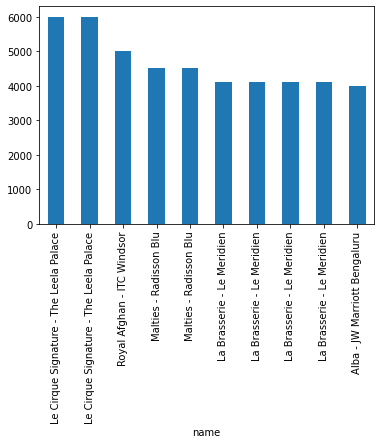

In [93]:
data['approx_cost(for two people)'] = data['approx_cost(for two people)'].astype(int)
data['approx_cost(for two people)'].nlargest(10).plot.bar()

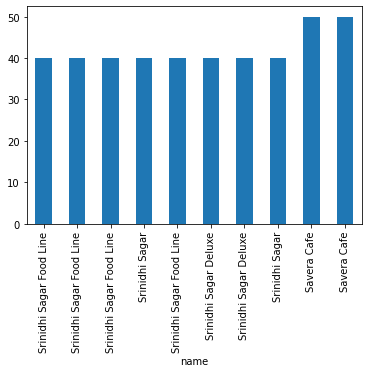

In [94]:
data['approx_cost(for two people)'].nsmallest(10).plot.bar()

In [95]:
data[data['approx_cost(for two people)'] <= 500];

In [96]:
df_budget = data[data['approx_cost(for two people)']<=500].loc[:,'approx_cost(for two people)']
df_budget.head()

name
Addhuri Udupi Bhojana                                 300
CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Down The Alley    500
The Coffee Shack                                      500
Caf-Eleven                                            450
T3H Cafe                                              300
Name: approx_cost(for two people), dtype: int64

In [97]:
df_budget = data[data['approx_cost(for two people)']<=500].loc[:,'approx_cost(for two people)']
df_budget = df_budget.reset_index()
df_budget.head()

,name,approx_cost(for two people)
0,Addhuri Udupi Bhojana,300
1,CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Down The A...,500
2,The Coffee Shack,500
3,Caf-Eleven,450
4,T3H Cafe,300


# Spatial Analysis

In [98]:
df[(df['rate']>4) & (df['approx_cost(for two people)']<=500)].shape

(2436, 17)

In [99]:
df = df.reset_index()

In [100]:
len(df[(df['rate']>4) & (df['approx_cost(for two people)']<=500)]['name'].unique())

372

In [101]:
df_new = df[(df['rate']>4) & (df['approx_cost(for two people)']<=500)]

In [102]:
df_new.head()

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
10,10,https://www.zomato.com/bangalore/caf%C3%A9-dow...,"12,29 Near PES University Back Gate, D'Souza N...",CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Down The A...,Yes,No,4.1,402,080 26724489\r\n+91 7406048982,Banashankari,Cafe,"Waffles, Pasta, Crispy Chicken, Honey Chilli C...",Cafe,500,"[('Rated 4.0', 'RATED\n We ended up here on a...",[],Cafes,Banashankari
12,12,https://www.zomato.com/bangalore/the-coffee-sh...,"6th Block, 3rd Stage, Banashankari, Bangalore",The Coffee Shack,Yes,Yes,4.2,164,+91 9731644212,Banashankari,Cafe,"Coffee, Spaghetti, Pancakes, Nachos, Pasta, Sa...","Cafe, Chinese, Continental, Italian",500,"[('Rated 4.0', ""RATED\n Food - 4/5\nAmbience ...",[],Cafes,Banashankari
34,34,https://www.zomato.com/bangalore/faasos-banash...,"80, BDA Complex, 2nd Stage, Banashankari, Bang...",Faasos,Yes,No,4.2,415,+91 7700020020,Banashankari,Quick Bites,"Rolls, Veggie Wrap, Chocolate Fantasy, Rice Bo...","North Indian, Biryani, Fast Food",500,"[('Rated 3.0', 'RATED\n Not worth for the mon...","['Chole Kulcha Meal', 'Upvas Aloo Paratha With...",Delivery,Banashankari
51,51,https://www.zomato.com/bangalore/shree-cool-po...,"1514, 4th Cross, 7th Main, RPC layout, 2nd Sta...",Shree Cool Point,Yes,No,4.1,28,+91 9900617124,Vijay Nagar,Quick Bites,NaN,"Fast Food, Street Food, Beverages",150,"[('Rated 5.0', 'RATED\n Who would say no to s...","['Vegetable Sandwich', 'Vegetable Sandwich wit...",Delivery,Banashankari
52,52,https://www.zomato.com/bangalore/corner-house-...,"808/6-1, 24th A Cross, K.R Road, 2nd Stage, Ba...",Corner House Ice Cream,No,No,4.3,345,080 26713965\r\n+91 9845444155,Banashankari,Dessert Parlor,"Hot Chocolate Fudge, Vanilla Ice Cream, Fudge ...","Ice Cream, Desserts",400,"[('Rated 3.0', ""RATED\n Always a fan of corne...",[],Delivery,Banashankari


In [103]:
location=[]
total=[]
for loc, location_df in df_new.groupby('location'):
	location.append(loc)
	total.append(len(location_df['name'].unique()))

In [104]:
location_df = pd.DataFrame(zip(location, total))
location_df.head()

,0,1
0,BTM,28
1,Banashankari,16
2,Banaswadi,1
3,Bannerghatta Road,9
4,Basavanagudi,24


In [105]:
location_df.columns = ['location', 'restaurant']
location_df.head()

,location,restaurant
0,BTM,28
1,Banashankari,16
2,Banaswadi,1
3,Bannerghatta Road,9
4,Basavanagudi,24


In [106]:
def return_budget(location, restaurant):
	budget = df[(df['approx_cost(for two people)']<=400) & (df	['location']==location) & (df['rate']>4) & (df	['rest_type']==restaurant)]
	return (budget['name'].unique())
 #With a location and type of restaurant, you can see the restaurant that fills that conditions, like a filter 

In [107]:
return_budget('BTM', 'Quick Bites')

array(['Swadista Aahar', 'Litti Twist', 'The Shawarma Shop', 'Gorbandh',
       'Yum In My Tum', 'Chaatimes', "Muthashy's", 'Swad Punjab Da',
       "Domino's Pizza", 'Roti Wala', 'Andhra Kitchen'], dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



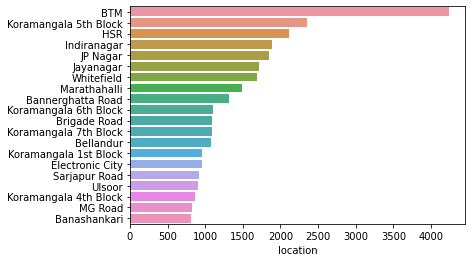

In [108]:
restaurant_location = df['location'].value_counts()[0:20]
sns.barplot(restaurant_location, restaurant_location.index)
#Number of restaurants im cities

In [109]:
locations = pd.DataFrame({'Name': df['location'].unique()})
locations.head()

,Name
0,Banashankari
1,Basavanagudi
2,Mysore Road
3,Jayanagar
4,Kumaraswamy Layout


In [110]:
geolocator = Nominatim(user_agent= 'app')

In [111]:
lat_lon = []
for location in locations['Name']:
	location = geolocator.geocode(location)
	if location is None:
		lat_lon.append(np.nan)
	else:
		geo = (location.latitude, location.longitude)
		lat_lon.append(geo)

In [112]:
locations['geo_loc'] = lat_lon

In [113]:
locations.head()

,Name,geo_loc
0,Banashankari,"(15.8876779, 75.7046777)"
1,Basavanagudi,"(12.9417261, 77.5755021)"
2,Mysore Road,"(12.3872141, 76.6669626)"
3,Jayanagar,"(27.64392675, 83.05280519687284)"
4,Kumaraswamy Layout,"(12.9081487, 77.5553179)"


In [114]:
locations.shape

(92, 2)

In [115]:
Rest_locations = pd.DataFrame(df['location'].value_counts().reset_index())
Rest_locations.head()

,index,location
0,BTM,4237
1,Koramangala 5th Block,2358
2,HSR,2113
3,Indiranagar,1892
4,JP Nagar,1849


In [116]:
Rest_locations.columns = ['Name', 'count']
Rest_locations.head()

,Name,count
0,BTM,4237
1,Koramangala 5th Block,2358
2,HSR,2113
3,Indiranagar,1892
4,JP Nagar,1849


In [117]:
Restaurant_locations = Rest_locations.merge(locations, on='Name', how='left').dropna()
Restaurant_locations.head()

,Name,count,geo_loc
0,BTM,4237,"(45.95485055, -112.49659530324134)"
1,Koramangala 5th Block,2358,"(12.9343774, 77.628415)"
2,HSR,2113,"(18.1475, 41.538889)"
3,Indiranagar,1892,"(12.9732913, 77.6404672)"
4,JP Nagar,1849,"(12.2655944, 76.6465404)"


In [118]:
np.array(Restaurant_locations['geo_loc'])

array([(45.95485055, -112.49659530324134), (12.9343774, 77.628415),
       (18.1475, 41.538889), (12.9732913, 77.6404672),
       (12.2655944, 76.6465404), (27.64392675, 83.05280519687284),
       (44.3730577, -71.6118577), (12.9552572, 77.6984163),
       (12.9288618, 77.6005975), (12.9400321, 77.6203272),
       (40.28745, -76.964526), (12.9302645, 77.6332585),
       (12.93577245, 77.66676103753434), (12.92769875, 77.6300969),
       (-6.18940725, 106.96671554738951), (12.924299, 77.6517653),
       (12.9778793, 77.6246697), (12.93433385, 77.63040639553275),
       (29.4534927, -98.6440138), (15.8876779, 75.7046777),
       (13.0221416, 77.6403368), (13.0027353, 77.5703253),
       (12.9417261, 77.5755021), (40.5758316, -74.1273021),
       (36.1014935, 44.6514938), (33.5935063, -79.0345627),
       (12.996845, 77.6130165), (40.7115227, -74.01043),
       (13.0093455, 77.6377094), (13.0170347, 77.5726006),
       (40.7652844, -76.373824), (13.0141618, 77.6518539),
       (12.9882338

In [119]:
lat,lon = zip(*np.array(Restaurant_locations['geo_loc']))

In [120]:
type(lat)

tuple

In [121]:
Restaurant_locations['lat'] = lat
Restaurant_locations['lon'] = lon

In [122]:
Restaurant_locations.head()

,Name,count,geo_loc,lat,lon
0,BTM,4237,"(45.95485055, -112.49659530324134)",45.954851,-112.496595
1,Koramangala 5th Block,2358,"(12.9343774, 77.628415)",12.934377,77.628415
2,HSR,2113,"(18.1475, 41.538889)",18.147500,41.538889
3,Indiranagar,1892,"(12.9732913, 77.6404672)",12.973291,77.640467
4,JP Nagar,1849,"(12.2655944, 76.6465404)",12.265594,76.646540


In [123]:
Restaurant_locations.drop('geo_loc', axis=1, inplace=True)

In [124]:
Restaurant_locations.head()

,Name,count,lat,lon
0,BTM,4237,45.954851,-112.496595
1,Koramangala 5th Block,2358,12.934377,77.628415
2,HSR,2113,18.147500,41.538889
3,Indiranagar,1892,12.973291,77.640467
4,JP Nagar,1849,12.265594,76.646540


In [125]:
import folium
from folium.plugins import HeatMap

In [126]:
def generatemap(default_location=[12.97, 77.59], default_zoom_start=12):
	basemap = folium.Map(location = default_location, zoom_start = default_zoom_start)
	return basemap

In [127]:
basemap = generatemap()

In [128]:
basemap

In [129]:
HeatMap(Restaurant_locations[['lat', 'lon', 'count']].values.tolist(), radius=15).add_to(basemap)

In [130]:
#HeatMap(locations[['lat', 'lon']].values.tolist(), radius=15).add_to(basemap)

In [131]:
basemap

# Most popular Cuisines

In [132]:
df2 = df[df['cuisines'] =='North Indian']

In [133]:
north_india = df2.groupby(['location'],as_index = False)['url'].agg('count')

In [134]:
north_india.head()

,location,url
0,BTM,262
1,Banashankari,35
2,Banaswadi,9
3,Bannerghatta Road,60
4,Basavanagudi,17


In [135]:
north_india.columns = ['Name', 'count']
north_india.head()

,Name,count
0,BTM,262
1,Banashankari,35
2,Banaswadi,9
3,Bannerghatta Road,60
4,Basavanagudi,17


In [136]:
north_india = north_india.merge(locations, on='Name', how ='left').dropna()
north_india.head()

,Name,count,geo_loc
0,BTM,262,"(45.95485055, -112.49659530324134)"
1,Banashankari,35,"(15.8876779, 75.7046777)"
2,Banaswadi,9,"(13.0141618, 77.6518539)"
3,Bannerghatta Road,60,"(12.9288618, 77.6005975)"
4,Basavanagudi,17,"(12.9417261, 77.5755021)"


In [137]:
north_india['lat'], north_india['lon'] = zip(*north_india['geo_loc'].values)
north_india.head()

,Name,count,geo_loc,lat,lon
0,BTM,262,"(45.95485055, -112.49659530324134)",45.954851,-112.496595
1,Banashankari,35,"(15.8876779, 75.7046777)",15.887678,75.704678
2,Banaswadi,9,"(13.0141618, 77.6518539)",13.014162,77.651854
3,Bannerghatta Road,60,"(12.9288618, 77.6005975)",12.928862,77.600598
4,Basavanagudi,17,"(12.9417261, 77.5755021)",12.941726,77.575502


In [138]:
north_india.drop('geo_loc', axis = 1, inplace = True)
north_india.head()

,Name,count,lat,lon
0,BTM,262,45.954851,-112.496595
1,Banashankari,35,15.887678,75.704678
2,Banaswadi,9,13.014162,77.651854
3,Bannerghatta Road,60,12.928862,77.600598
4,Basavanagudi,17,12.941726,77.575502


In [139]:
basemap = generatemap()
HeatMap(north_india[['lat', 'lon', 'count']].values.tolist(), radius=15).add_to(basemap)
basemap

In [140]:
df_1 = df.groupby(['rest_type', 'name']).agg('count')
df_1

index  ...  listed_in(city)
rest_type          name                                ...                 
Bakery             7th Heaven                       2  ...                2
                   A Little For Love                1  ...                1
                   Adarsh Bakery                    2  ...                2
                   Adi's Cake N Cafe                2  ...                2
                   Albert Bakery                    1  ...                1
...                                               ...  ...              ...
Takeaway, Delivery Yumlane                          2  ...                2
                   Yumme Veg                        2  ...                2
                   Zamorin's Mappillah Biryani      1  ...                1
                   Zu's Doner Kebaps                1  ...                1
                   eat.fit                          2  ...                2

[7712 rows x 16 columns]

In [141]:
df_1.sort_values(['url'], ascending=False)

index  ...  listed_in(city)
rest_type           name                        ...                 
Cafe                Cafe Coffee Day         89  ...               89
Casual Dining, Cafe Onesta                  85  ...               85
Quick Bites         Five Star Chicken       67  ...               67
                    Domino's Pizza          60  ...               60
                    McDonald's              59  ...               59
...                                        ...  ...              ...
                    New Students Corner      1  ...                1
Dessert Parlor      Mr Gola                  1  ...                1
Casual Dining       Parijatha Paradise       1  ...                1
                    Parijatha Fish Land      1  ...                1
Delivery            SaJuSo                   1  ...                1

[7712 rows x 16 columns]

In [142]:
df_1.sort_values(['url'], ascending=False).groupby(['rest_type'], as_index=False).apply(lambda x: x.sort_values(by='url', ascending=False))

index  ...  listed_in(city)
   rest_type          name                               ...                 
0  Bakery             Just Bake                      44  ...               44
                      Warm Oven                      28  ...               28
                      INDULGE by InnerChef           28  ...               28
                      Karachi Bakery                 26  ...               26
                      CakeZone                       21  ...               21
...                                                 ...  ...              ...
86 Takeaway, Delivery Agraharam Meal                  1  ...                1
                      Adyar Ananda Bhavan Sweets      1  ...                1
                      Faasos                          1  ...                1
                      @North Parontha Hut             1  ...                1
                      Lucky Singh & Co                1  ...                1

[7712 rows x 16 columns]

In [143]:
df_1.sort_values(['url'], ascending=False).groupby(['rest_type'], as_index=False).apply(lambda x: x.sort_values(by='url', ascending=False))['url'].reset_index()

,level_0,rest_type,name,url
0,0,Bakery,Just Bake,44
1,0,Bakery,Warm Oven,28
2,0,Bakery,INDULGE by InnerChef,28
3,0,Bakery,Karachi Bakery,26
4,0,Bakery,CakeZone,21
...,...,...,...,...
7707,86,"Takeaway, Delivery",Agraharam Meal,1
7708,86,"Takeaway, Delivery",Adyar Ananda Bhavan Sweets,1
7709,86,"Takeaway, Delivery",Faasos,1
7710,86,"Takeaway, Delivery",@North Parontha Hut,1


In [144]:
dataset=df_1.sort_values(['url'], ascending=False).groupby(['rest_type'], 
as_index=False).apply(lambda x: x.sort_values(by='url', ascending=False))['url'].reset_index().rename(columns = {'url':'count'})

In [145]:
dataset

,level_0,rest_type,name,count
0,0,Bakery,Just Bake,44
1,0,Bakery,Warm Oven,28
2,0,Bakery,INDULGE by InnerChef,28
3,0,Bakery,Karachi Bakery,26
4,0,Bakery,CakeZone,21
...,...,...,...,...
7707,86,"Takeaway, Delivery",Agraharam Meal,1
7708,86,"Takeaway, Delivery",Adyar Ananda Bhavan Sweets,1
7709,86,"Takeaway, Delivery",Faasos,1
7710,86,"Takeaway, Delivery",@North Parontha Hut,1


In [146]:
casual=dataset[dataset['rest_type'] == 'Casual Dining']

In [147]:
casual

,level_0,rest_type,name,count
1001,24,Casual Dining,Empire Restaurant,58
1002,24,Casual Dining,Beijing Bites,48
1003,24,Casual Dining,Mani's Dum Biryani,47
1004,24,Casual Dining,Chung Wah,46
1005,24,Casual Dining,Oye Amritsar,41
...,...,...,...,...
2635,24,Casual Dining,Uppercut - Sheraton Grand Bengaluru Whitefield...,1
2636,24,Casual Dining,Utsav Restaurant,1
2637,24,Casual Dining,VMS Star Biriyani,1
2638,24,Casual Dining,Veruthe Oru Thattukada,1
